In [4]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 3.7 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 KB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01


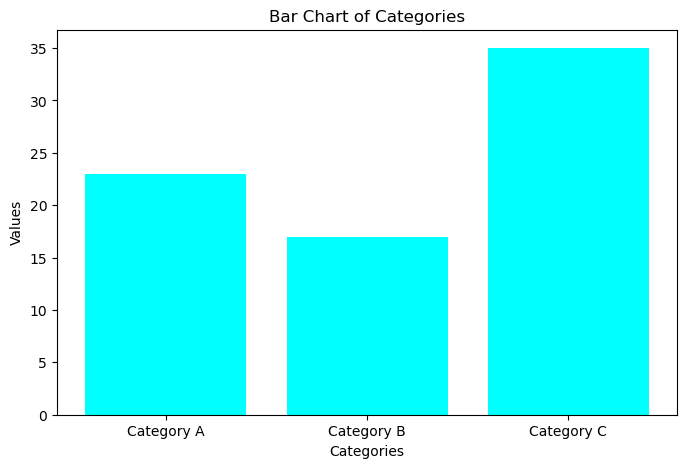

In [7]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

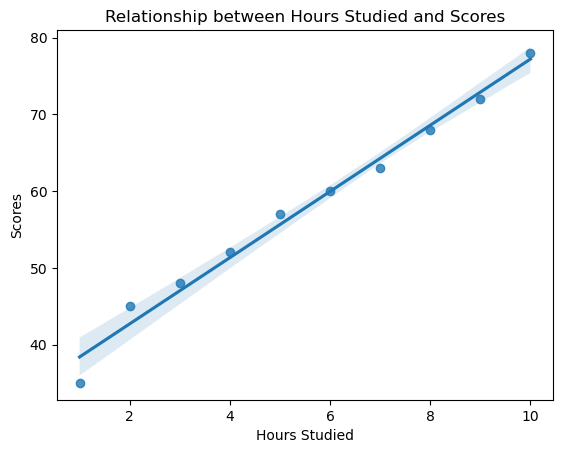

In [8]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


In [10]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset Titanic
df = pd.read_csv("/home/sita/Downloads/titanic.csv")

# Tampilkan shape data
print("Shape awal:", df.shape)

# Tampilkan 5 data teratas
df.head()


Shape awal: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


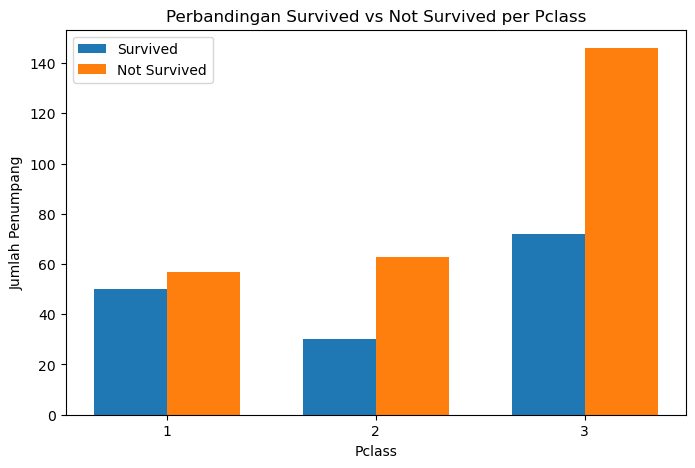

In [11]:
# 1 MULTI-BAR CHART DENGAN MATPLOTLIB
# Membandingkan jumlah Survived dan Not Survived berdasarkan kelas (Pclass)

import matplotlib.pyplot as plt
import numpy as np

# Hitung jumlah penumpang per kelas untuk masing-masing status
survived_count = df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()
not_survived_count = df[df['Survived'] == 0]['Pclass'].value_counts().sort_index()

# Menyiapkan posisi bar
x = np.arange(len(survived_count))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, survived_count, width, label='Survived')
plt.bar(x + width/2, not_survived_count, width, label='Not Survived')

plt.xticks(x, survived_count.index)
plt.xlabel("Pclass")
plt.ylabel("Jumlah Penumpang")
plt.title("Perbandingan Survived vs Not Survived per Pclass")
plt.legend()
plt.show()


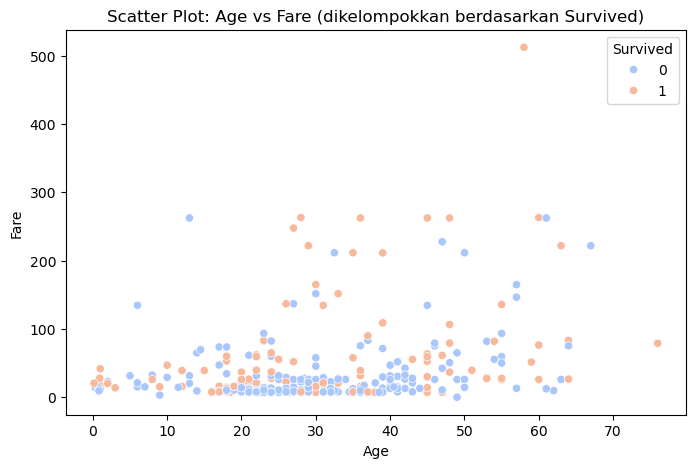

In [12]:
# 2 SCATTER PLOT DENGAN SEABORN
# Mengeksplorasi hubungan Age dan Fare berdasarkan Survived

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Age",
    y="Fare",
    hue="Survived",
    palette="coolwarm"
)

plt.title("Scatter Plot: Age vs Fare (dikelompokkan berdasarkan Survived)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


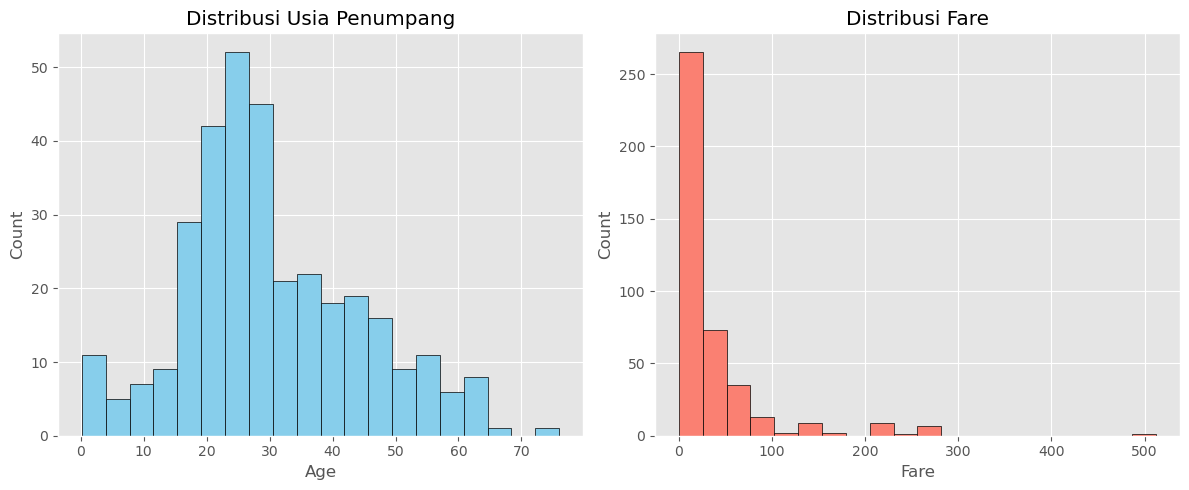

In [13]:
# 3 CUSTOM PLOT LAYOUT & COLOR SCHEMES
# Membuat subplot: histogram Age dan histogram Fare dengan custom style

plt.style.use("ggplot")  # gaya plot

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram Age
ax[0].hist(df['Age'].dropna(), bins=20, color="skyblue", edgecolor="black")
ax[0].set_title("Distribusi Usia Penumpang")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")

# Histogram Fare
ax[1].hist(df['Fare'], bins=20, color="salmon", edgecolor="black")
ax[1].set_title("Distribusi Fare")
ax[1].set_xlabel("Fare")
ax[1].set_ylabel("Count")

# Atur layout agar tidak bertabrakan
plt.tight_layout()
plt.show()
